In [1]:
import numpy as np
import pandas as pd

# 生成缺失值数据

In [2]:
data = pd.DataFrame({'A':[None,2,3,4,None,6],'B':[4,None,7,10,15,21],'C':[3,6,18,7,10,13]})
data

,A,B,C
0,NaN,4.0,3
1,2.0,NaN,6
2,3.0,7.0,18
3,4.0,10.0,7
4,NaN,15.0,10
5,6.0,21.0,13


# 判断是否存在缺失值

In [3]:
data.isnull().sum(axis=0) # 检测每列特征的缺失值数量

A    2
B    1
C    0
dtype: int64

# 删除缺失值
- `DataFrame.dropna()`直接删除带有缺失值的行/列

In [4]:
data_1 = data.copy()
data_1 = data_1.dropna(axis=0,how='any') # 以行为参考，如果有空值，就删除该行
data_1

,A,B,C
2,3.0,7.0,18
3,4.0,10.0,7
5,6.0,21.0,13


In [5]:
data_1 = data.copy()
data_1 = data_1.dropna(axis=1,how='any') # 以列为参考，如果有空值，就删除该列
data_1

,C
0,3
1,6
2,18
3,7
4,10
5,13


# 缺失值填充
## 指定值直接填充

In [6]:
data_2 = data.copy()
data_2 = data_2.fillna(value=666) # 指定值直接填充
data_2

,A,B,C
0,666.0,4.0,3
1,2.0,666.0,6
2,3.0,7.0,18
3,4.0,10.0,7
4,666.0,15.0,10
5,6.0,21.0,13


## 统计填充

In [7]:
# 均值填充
data_3 = data.copy()
data_3 = data_3.fillna(data_3.mean()) 
# 中位数填充
data_3 = data.copy()
data_3 = data_3.fillna(data_3.median()) 
# 使用前一个数据进行填充
data_3 = data.copy()
data_3 = data_3.fillna(value=None, method='ffill',axis=0) 
# 使用后一个数据进行填充
data_3 = data.copy()
data_3 = data_3.fillna(value=None, method='backfill',axis=0) 

In [8]:
# Sklearn 插值工具
from sklearn.impute import SimpleImputer
# Strategy可以指定填充方式，mean均值填补，median中位数填补，most_frequent众数填补，constant常数填补
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
data_3 = data.copy()
data_3 = imputer.fit_transform(data_3)
data_3

array([[ 3.75,  4.  ,  3.  ],
       [ 2.  , 11.4 ,  6.  ],
       [ 3.  ,  7.  , 18.  ],
       [ 4.  , 10.  ,  7.  ],
       [ 3.75, 15.  , 10.  ],
       [ 6.  , 21.  , 13.  ]])

## 热卡填充法（就近补齐）
- 对于一个包含空值的对象，热卡填充法在完整数据中找到一个与它最相似的对象，然后用这个相似对象的值来进行填充。
- 通常会找到超出一个的相似对象，在所有匹配对象中没有最好的，而是从中随机的挑选一个作为填充值，不同的问题选用不同的标准来对相似进行判定。
- 但不同的问题可能会选用不同的标准来对相似进行判定，难以定义相似标准，主观因素较多。

## KNN最近邻填充
- 先根据欧式距离或相关分析来确定距离具有缺失数据样本最近的K个样本，将这K个值加权平均来估计该样本的缺失数据。
- 这个方法要求我们选择k的值（最近邻居的数量），以及距离度量。
- KNN既可以预测离散属性（加权投票）也可以预测连续属性（加权平均）。

In [9]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(missing_values=np.nan, 
                     n_neighbors=2, # 用于插补的相邻样本数。
                     weights='distance') # 用于预测的权重函数
data_4 = data.copy()
data_4 = imputer.fit_transform(data_4)
data_4

array([[ 2.74083042,  4.        ,  3.        ],
       [ 2.        ,  7.92915401,  6.        ],
       [ 3.        ,  7.        , 18.        ],
       [ 4.        , 10.        ,  7.        ],
       [ 2.984845  , 15.        , 10.        ],
       [ 6.        , 21.        , 13.        ]])

## 多重插补
- 在处理缺失值时，可以通过链式方程的多重插补（MICE，Multiple Imputation by Chained Equations）估算缺失值。从技术上讲，任何能够推理的预测模型都可以用于MICE。 
- `miceforest`库可以实现随机森林的链式方程式（MICE）多重插补，具有快速、内存利用率高的特征，无需太多设置即可插入缺失的分类和数值数据，并且具有一系列可用的诊断图。

In [10]:
import miceforest as mf
from sklearn.datasets import load_iris
# 加载鸢尾花数据集
iris = pd.concat(load_iris(as_frame=True,return_X_y=True),axis=1)
iris.rename({"target": "species"}, inplace=True, axis=1)
iris['species'] = iris['species'].astype('category')
# 引入缺失数据
iris_amp = mf.ampute_data(iris,perc=0.25,random_state=1991)
iris_amp

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,NaN,3.5,1.4,0.2,0
1,NaN,3.0,1.4,0.2,0
2,4.7,3.2,1.3,NaN,0
3,4.6,3.1,1.5,0.2,NaN
4,5.0,NaN,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,NaN
146,NaN,2.5,5.0,1.9,2
147,6.5,NaN,5.2,2.0,2
148,NaN,NaN,NaN,2.3,2


In [11]:
# 初始化插补模型
kernel = mf.ImputationKernel( 
  iris_amp,
  datasets=5, # 将datasets设置为5，创建多个插补数据集
  save_all_iterations=True,
  random_state=666
)
# MICE算法进行2次迭代
kernel.mice(2) 
# 直接从内核中获取已插值的数据集
completed_dataset = kernel.complete_data(dataset=0, inplace=False)
completed_dataset

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.0,3.5,1.4,0.2,0
1,4.4,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.5,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,5.8,2.5,5.0,1.9,2
147,6.5,2.9,5.2,2.0,2
148,7.7,2.8,6.9,2.3,2


# 异常值检测
## 箱线图

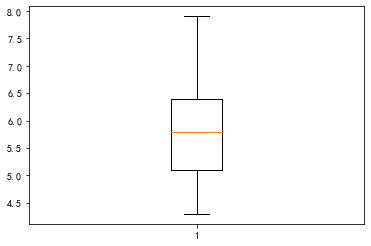

In [12]:
from matplotlib import pyplot as plt
# 加载鸢尾花数据集
iris = pd.concat(load_iris(as_frame=True,return_X_y=True),axis=1).iloc[:,0]
_ = plt.boxplot(iris)

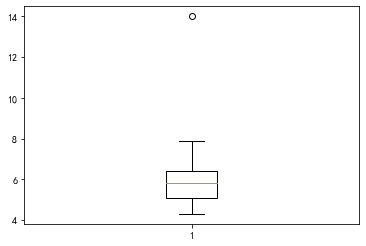

In [13]:
# 生成异常值
iris_1 = iris.copy()
iris_1[4]=14
_ = plt.boxplot(iris_1)

## 3 Sigma

In [14]:
def three_sigma(data, n=3):
    """
    data: DataFrame某一列
    """
    rule = (data.mean() - n * data.std() > data) | (data.mean() + n * data.std() < data) 
    index = np.arange(data.shape[0])[rule]
    outrange = data.iloc[index]
    return outrange

# 异常值检测
print(three_sigma(iris,n=3))

Series([], Name: sepal length (cm), dtype: float64)


In [15]:
# 生成异常值
iris_1 = iris.copy()
iris_1[4]=14
print(three_sigma(iris_1,n=3))

4    14.0
Name: sepal length (cm), dtype: float64
